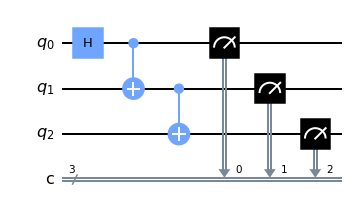

In [2]:
from qiskit import *
%matplotlib inline

n_qbit = 3

circuit = QuantumCircuit(n_qbit, n_qbit)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0,1,2],[0,1,2])

circuit.draw(output='mpl')

In [3]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots=1024).result()

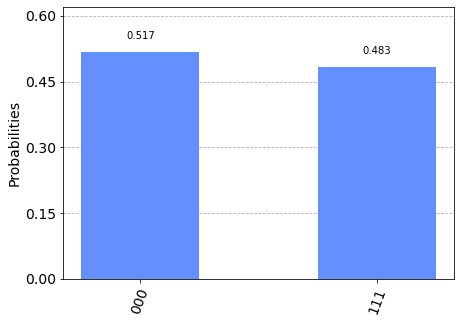

In [4]:
from qiskit.visualization import plot_histogram

plot_histogram(sim_result.get_counts(circuit))

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibm_nairobi')

ibmqfactory.load_account:WARNING:2023-04-26 23:55:41,316: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
job = execute(circuit, backend = device, shots = 1024)

print(job.job_id())

from qiskit.tools.monitor import job_monitor

job_monitor(job)

ch4ps8gl1tcjfhm8kb30
Job Status: job is queued (None)

In [ ]:
device_result = job.result()

plot_histogram(device_result.get_counts(circuit))

In [ ]:
"""
mitighiamo il rumore
"""

from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

cal_circuits, state_lables = complete_meas_cal(qr = circuit.qregs[0], circlabel= 'measerromitigationcal')

cal_circuits[2].draw(output='mpl')

In [ ]:
cal_job = execute(cal_circuits,
                  backend = device,
                  shots = 1024,
                  optimization_level = 0
                  )

print(cal_job.job_id())

job_monitor(cal_job)
cal_result = cal_job.result()

plot_histogram(cal_result.get_counts(cal_result[3]))

In [ ]:
meas_fitter = CompleteMeasFitter(cal_result, state_lables)

meas_fitter.plot_calibration()

In [ ]:
meas_fitter = meas_fitter.filter

mitigated_result = meas_fitter.apply(device_result)

device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.counts(circuit)

plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])